Useful link: https://www.sqlitetutorial.net/sqlite-python/

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sqlite3
import os

In [200]:
common_path = os.getcwd()
datpath = common_path + "\\test.db"

# Basic part

In [58]:
conn = sqlite3.connect(datpath) # establish a conenction to the SQLite database from python
cur = conn.cursor() # get a cursor object from the connection object

#                                 #
# You can add your own code here. #
#                                 #

conn.commit() # save (commit) the changes
conn.close() # close

# CREATE TABLE

|  a1    |   a2   |   a3   |
| ------ | ------ | ------ |
|    4   |     3  |    2   |
|   10   |  NULL  |  NULL  |

In [44]:
conn = sqlite3.connect(datpath) # establish a conenction to the SQLite database from python
cur = conn.cursor() # get a cursor object from the connection object

# Create a table named tab1
cur.execute('CREATE TABLE IF NOT EXISTS tab1 (a1,a2,a3);')

# Insert a row of data. The names of columns are a1, a2, and a3.
cur.execute("INSERT INTO tab1 (a1,a2,a3) VALUES (?,?,?);",(4,3,2))

# Insert a row of data. The names of columns are a1, a2, and a3.
cur.execute("INSERT INTO tab1(a1) VALUES (10);")

# show the contents of a table
print("Check the created database")
cur.execute('SELECT * FROM tab1')
print(cur.fetchall())
# Save (commit) the changes
conn.commit()

# close
conn.close()

Check the created database
[(4, 3, 2), (10, None, None), (4, 3, 2), (10, None, None)]


# Create pandas dataframe and save it on a database

In [50]:
data = {'name':['Tom', 'nick', 'krish', 'jack'],
        'age':[20, 21, 19, 18],
        'weight':[70.1,72.4,74.5,76.8]
       } 
df= pd.DataFrame(data)

df.head()

,name,age,weight
0,Tom,20,70.1
1,nick,21,72.4
2,krish,19,74.5
3,jack,18,76.8


In [66]:
conn = sqlite3.connect(datpath) # establish a conenction to the SQLite database from python
cur = conn.cursor() # get a cursor object from the connection object

# Create a table named tab2 with data
df.to_sql('tab2', conn, if_exists='replace')

# show the ages
print("Check the ages")
for row in cur.execute('SELECT age FROM tab2'):
    print(row)
    
# Save (commit) the changes
conn.commit()

# close
conn.close()

Check the ages
(20,)
(21,)
(19,)
(18,)


# Save and load image data

A sample image is shown below.

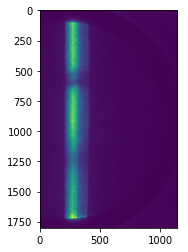

In [185]:
filename="test_image"

img=np.loadtxt(filename + '.txt') # load an image data
n=img.shape[0] # size of the image
m=img.shape[1] # size of the image
plt.imshow(img) # visualization
plt.show()

The image data, which is a numpy array, is stored in a pandas dataframe. The image data is originaly a matrix, but it is converted into a vector.

In [202]:
dfimg=pd.DataFrame(data=img.reshape(-1,1),columns=[filename]) # create a dataframe
dfimg.head()

,test_image
0,115.0
1,118.1
2,116.0
3,115.6
4,115.0


SQLite does not support `ALTER TABLE DROP COLUMN` statement. Hence, the procedure is as follows:
- A new table (tab_df) is created from a pandas dataframe.
- A new blanck table (tab) is created.
- The data which is originally stored in the dataframe is inserted into the blanck table (tab).
- The table made from the pandas dataframe (tab_df) is deleted.

In [192]:
conn = sqlite3.connect(datpath) # establish a conenction to the SQLite database from python
cur = conn.cursor() # get a cursor object from the connection object

# create a table named tab3_df from a dataframe
dfimg.to_sql('tab3_df', conn, if_exists='replace')

# create a blanck table
cur.execute("CREATE TABLE IF NOT EXISTS tab3(%s);"%filename)

# copy
cur.execute("INSERT INTO tab3(%s) SELECT %s FROM tab3_df;"%(filename,filename))

# delete the original table
cur.execute("DROP TABLE tab3_df")

# get data
cur.execute('SELECT * FROM tab3')
im=cur.fetchall()

# save (commit) the changes
conn.commit()

# close
conn.close()

The data stored in the database is converted to numpy array in the previous cell. Here, the image is shown again.

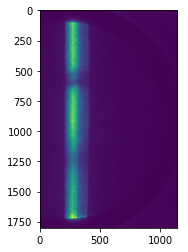

In [203]:
plt.imshow(np.array(im)[:,0].reshape(n,m))
plt.show()